In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset from the provided Kaggle link
df = pd.read_csv('StressLevelDataset.csv')

# Display the first few rows
print(df.head())
print(df.describe())

   anxiety_level  self_esteem  mental_health_history  depression  headache  \
0             14           20                      0          11         2   
1             15            8                      1          15         5   
2             12           18                      1          14         2   
3             16           12                      1          15         4   
4             16           28                      0           7         2   

   blood_pressure  sleep_quality  breathing_problem  noise_level  \
0               1              2                  4            2   
1               3              1                  4            3   
2               1              2                  2            2   
3               3              1                  3            4   
4               3              5                  1            3   

   living_conditions  ...  basic_needs  academic_performance  study_load  \
0                  3  ...            2        

In [3]:
# Identify scale-like vs continuous columns in your dataset
scale_like_cols = []
continuous_cols = []

for col in df.select_dtypes(include=['number']).columns:
    unique_vals = df[col].nunique()
    col_range = df[col].max() - df[col].min()

    # Heuristic rule:
    # If the column has few unique values (<=15) AND the range is small (<=15),
    # then it's likely a scale/ordinal variable → skip outlier detection
    if unique_vals <= 15 and col_range <= 15:
        scale_like_cols.append(col)
    else:
        continuous_cols.append(col)

print("Columns likely SCALE (no outlier detection):", scale_like_cols)
print("Columns likely CONTINUOUS (apply outlier detection):", continuous_cols)

# Calculate and print the mean of continuous columns
print("\nMean of continuous columns:")
print(df[continuous_cols].mean())

Columns likely SCALE (no outlier detection): ['mental_health_history', 'headache', 'blood_pressure', 'sleep_quality', 'breathing_problem', 'noise_level', 'living_conditions', 'safety', 'basic_needs', 'academic_performance', 'study_load', 'teacher_student_relationship', 'future_career_concerns', 'social_support', 'peer_pressure', 'extracurricular_activities', 'bullying', 'stress_level']
Columns likely CONTINUOUS (apply outlier detection): ['anxiety_level', 'self_esteem', 'depression']

Mean of continuous columns:
anxiety_level    11.063636
self_esteem      17.777273
depression       12.555455
dtype: float64


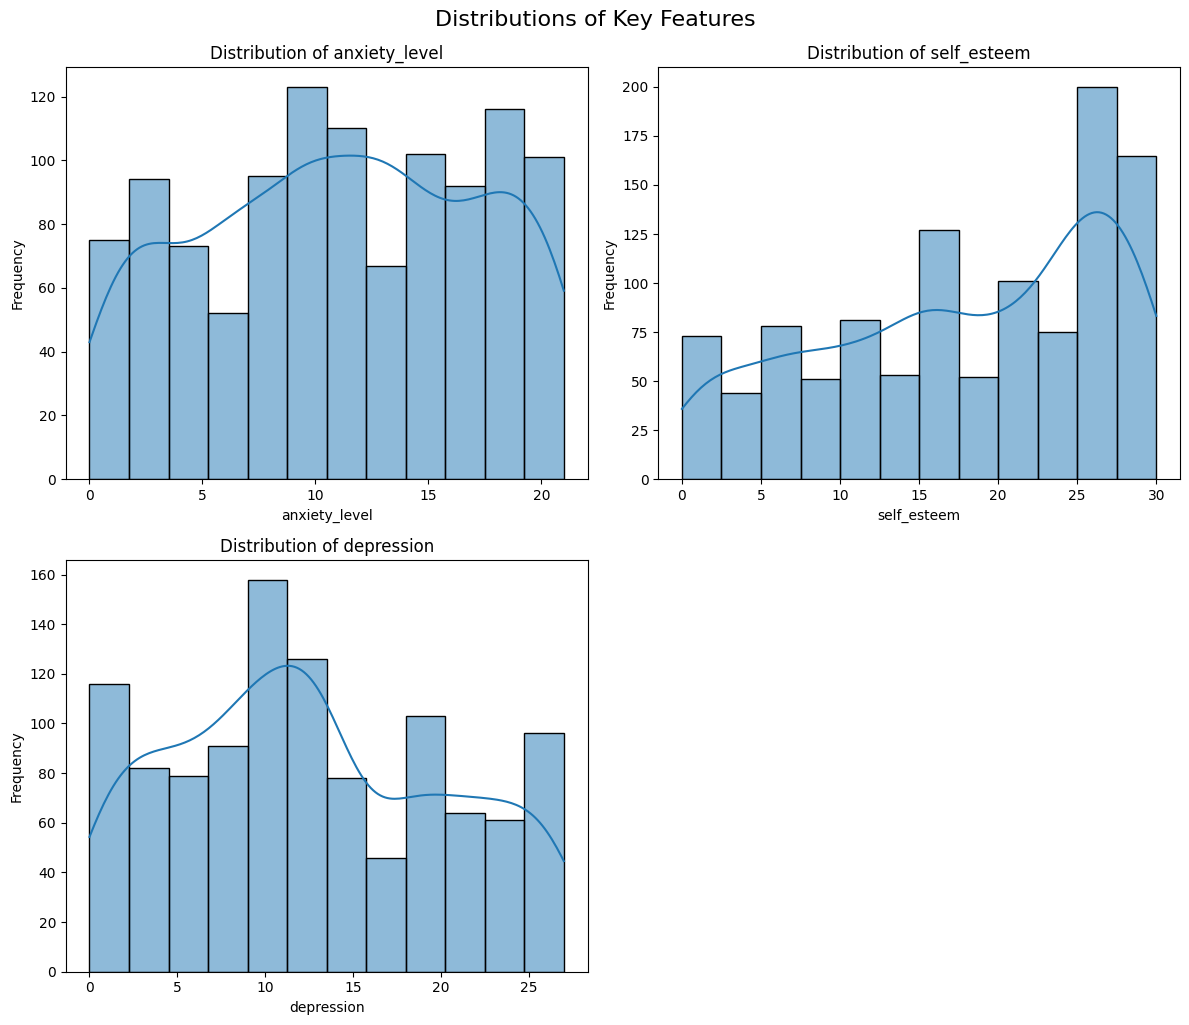

In [4]:
# Select a few key numerical columns for visualization
key_numerical_cols = ['anxiety_level', 'self_esteem', 'depression']

# Create subplots for a selection of histograms
num_cols = len(key_numerical_cols)
num_rows = (num_cols + 1) // 2 # Arrange in 2 columns

fig, axes = plt.subplots(num_rows, 2, figsize=(12, num_rows * 5))
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

for i, col in enumerate(key_numerical_cols):
    sns.histplot(data=df, x=col, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle('Distributions of Key Features', y=1.02, fontsize=16) # Add a main title
plt.show()

In [5]:
columns_to_check = ['anxiety_level', 'self_esteem', 'depression']
print("\n--- Outlier Detection Report ---")

for col in columns_to_check:
    print(f"\nChecking column: '{col}'")

    # Calculate Q1, Q3, and IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define outlier bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    # --- Step 3: Report the Findings ---
    if not outliers.empty:
        print(f"Found {len(outliers)} outliers.")
        # Display the first 5 outlier rows for inspection
        print("Here are some of the outlier rows:")
        print(outliers.head())
    else:
        print("No outliers detected.")


--- Outlier Detection Report ---

Checking column: 'anxiety_level'
No outliers detected.

Checking column: 'self_esteem'
No outliers detected.

Checking column: 'depression'
No outliers detected.


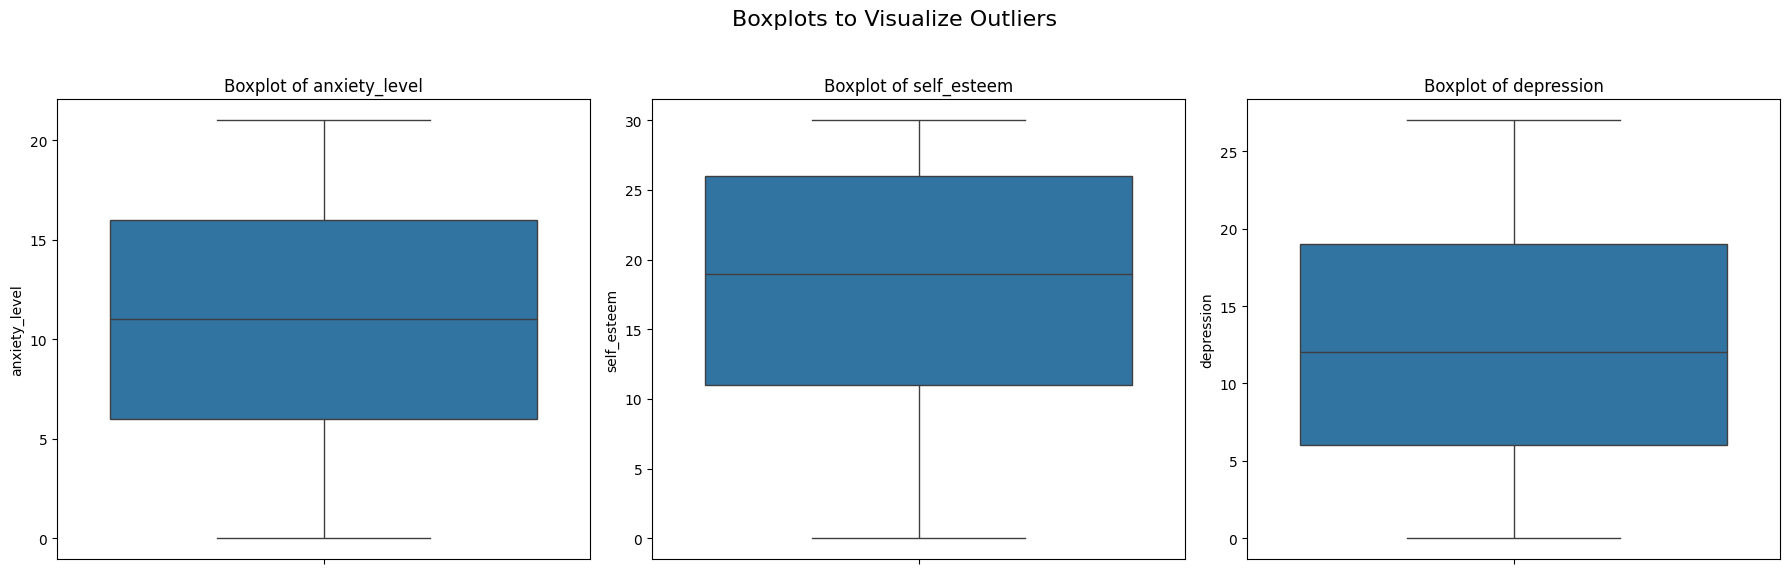

In [6]:
columns_to_plot = ['anxiety_level', 'self_esteem', 'depression']

# This sets up a figure that will hold our three plots side-by-side
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Add a main title to the entire figure
fig.suptitle('Boxplots to Visualize Outliers', fontsize=16)

# Loop through each column and create a boxplot for it
for i, col in enumerate(columns_to_plot):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_ylabel(col)

# Adjust the layout to prevent titles from overlapping
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# This will save the generated image as a PNG file.
plt.savefig('outlier_boxplots.png')
